# Домашнее задание к лекции "Визуализация данных"

### Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:

* [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
* [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
* [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
# подключаем библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#читаем файл с данными по уровню счастья 2019
df_happy_world = pd.read_csv('World_Happiness_Report_2019.csv')
df_happy_world.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df_happy_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


*Интерпретация данных*
* Overall rank * Общий рейтинг
* Country or region * Страна или Регион
* Score * Очки
* GDP per capita * ВВП на душу населения
* Social support * Социальная поддержка
* Healthy life expectancy * Ожидаемая продолжительность здоровой жизни
* Freedom to make life choices * Свобода делать жизненный выбор
* Generosity * Щедрость
* Perceptions of corruption * Восприятие коррупции

Первоначально: пропусков нет, все данные, кроме столбца с названием Страны или Региона - числовые.

In [4]:
df_happy_world.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<AxesSubplot:>

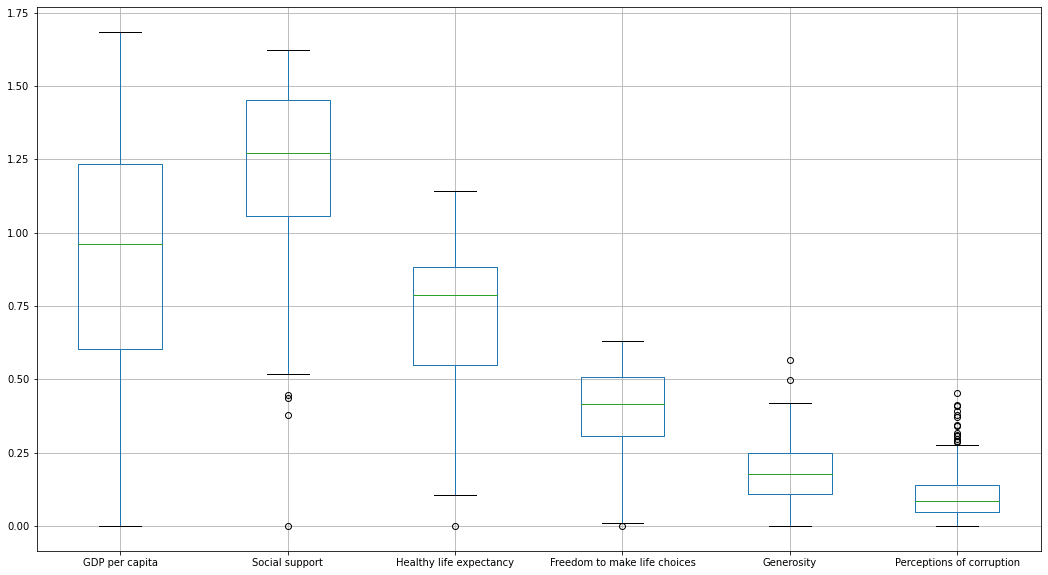

In [5]:
#основные статистики для 
#'GDP per capita','Social support', 'Healthy life expectancy', 
#'Freedom to make life choices Generosity', 'Perceptions of corruption'
df_happy_world.boxplot(column=['GDP per capita','Social support', 'Healthy life expectancy', 
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], figsize=(18, 10))

Данные по ВВП не содержат выбросы, поскольку являются объективной величиной.
Данные по остальным показателям субъективны, больше всего выбросов в "Восприятии коррупции".

Text(0.5, 0, 'Score')

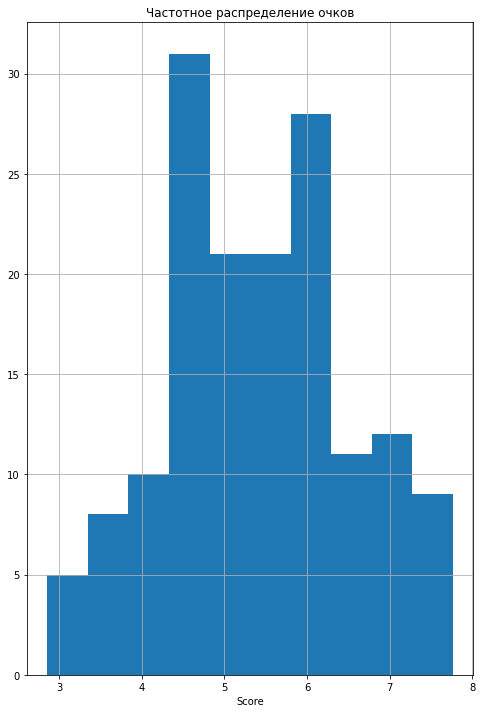

In [6]:
#Частотное распределение очков
df_happy_world.hist(column='Score', figsize=(8, 12))
plt.title('Частотное распределение очков')
plt.xlabel('Score')

Больше всего очков в районе 4,5 и 6. Распределение не является нормальным.

Text(0, 0.5, 'GDP per capita')

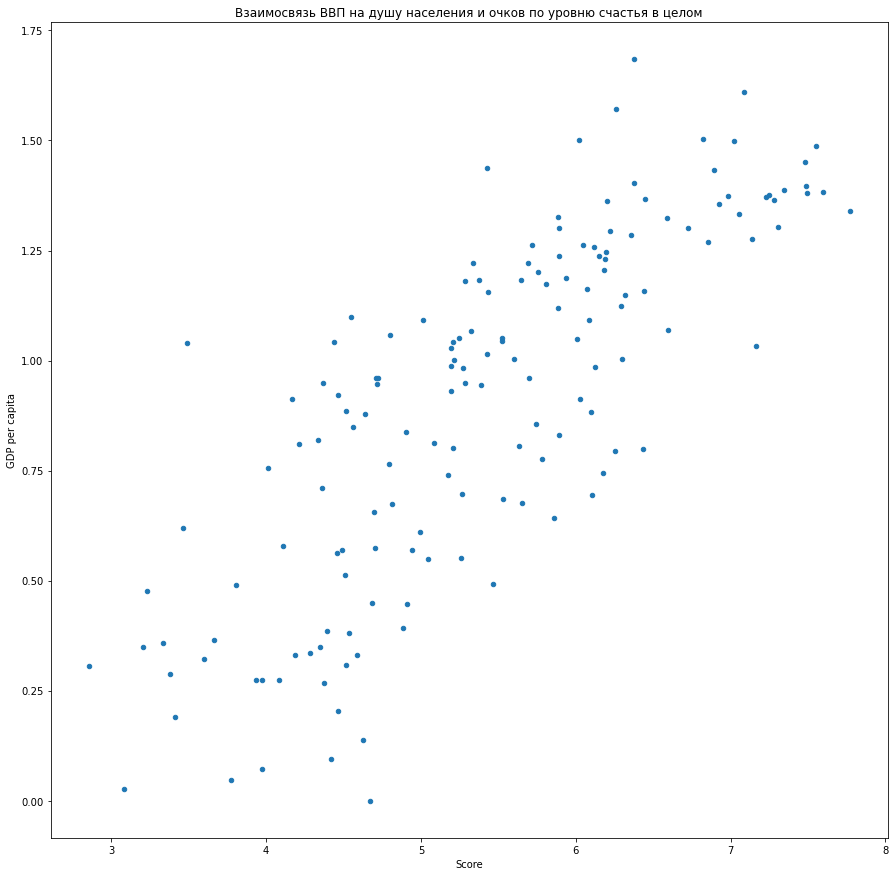

In [7]:
#scatter for GDP & score
df_happy_world.plot.scatter('Score', 'GDP per capita', figsize=(15,15))
plt.title('Взаимосвязь ВВП на душу населения и очков по уровню счастья в целом')
plt.xlabel('Score')
plt.ylabel('GDP per capita')

Чем выше уровень ВВП, тем выше очки по уровню счастья вцелом. Уровень ВВП напрямую влияет на ощущение счастья.

In [8]:
#top-5 happy
df_top_happy = df_happy_world[['Country or region', 'GDP per capita','Social support', 
                              'Healthy life expectancy', 'Freedom to make life choices', 
                              'Generosity', 'Perceptions of corruption']].head(5)
df_top_happy

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


Text(0.5, 1.0, 'Показатели топ-5 самых счастливых стран')

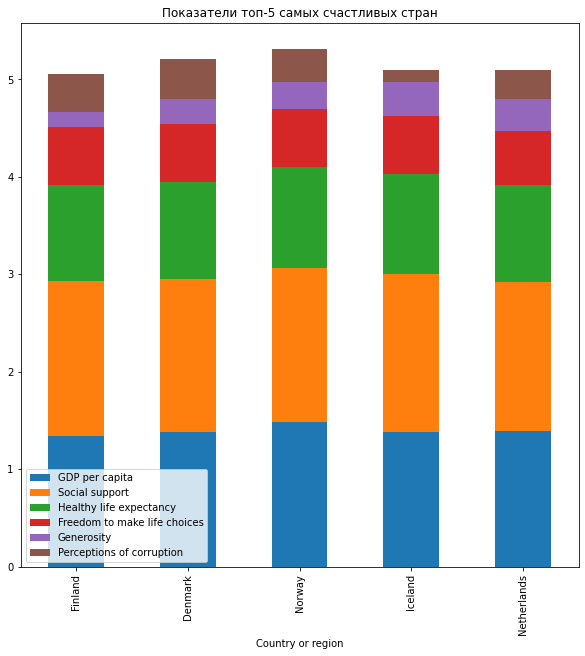

In [9]:
#bar for countries happy
df_top_happy.plot.bar(x='Country or region', stacked=True, figsize=(10, 10))
plt.title('Показатели топ-5 самых счастливых стран')

Основные показатели счастья для самых счастливых стран приблизительно равны. Т.е все счастливые страны, счастливы одинаково.

In [10]:
#top-5 unhappy
df_top_unhappy = df_happy_world[['Country or region', 'GDP per capita','Social support', 
                              'Healthy life expectancy', 'Freedom to make life choices', 
                              'Generosity', 'Perceptions of corruption']].tail(5)
df_top_unhappy

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035
155,South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


Text(0.5, 1.0, 'Показатели топ-5 самых несчастливых стран')

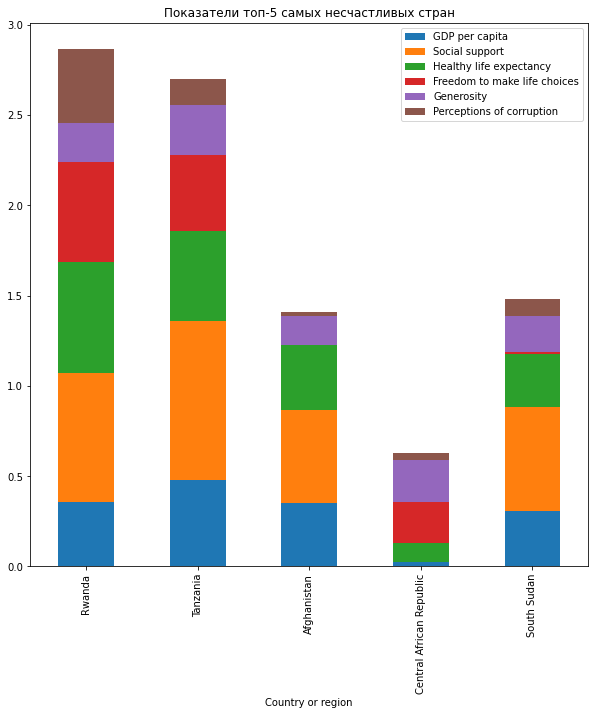

In [11]:
#bar for countries unhappy
df_top_unhappy.plot.bar(x='Country or region', stacked=True, figsize=(10, 10))
plt.title('Показатели топ-5 самых несчастливых стран')

Основные показатели счастья для самых несчастливых стран заметно различаются. Т.е все несчастливые страны, несчастны по-своему.